In [20]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt

%matplotlib inline

## USDA Food Database

In [2]:
db = json.load(open("dataset/foods.json.txt"))

In [3]:
len(db)

6636

In [4]:
db[0].keys()

dict_keys(['description', 'manufacturer', 'portions', 'id', 'tags', 'group', 'nutrients'])

In [5]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [6]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients.head()

description        group units   value
0                      Protein  Composition     g   25.18
1            Total lipid (fat)  Composition     g   29.20
2  Carbohydrate, by difference  Composition     g    3.06
3                          Ash        Other     g    3.28
4                       Energy       Energy  kcal  376.00

In [7]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

info.head()

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

In [8]:
info.describe()

id
count   6636.000000
mean   15733.055304
std     8715.095274
min     1008.000000
25%    10170.750000
50%    14445.000000
75%    19188.250000
max    93600.000000

In [9]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [10]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [11]:
# Now, to do some analysis on all of the nutrient data, it’s easiest to assemble the nutrients
# for each food into a single large table. To do so, we need to take several steps. First, I’ll
# convert each list of food nutrients to a DataFrame, add a column for the food id, and
# append the DataFrame to a list. Then, these can be concatenated together with concat:

nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

In [12]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ MB


In [13]:
# check for duplicates, 
nutrients.duplicated().sum()

14179

In [14]:
# dropping the dups
nutrients = nutrients.drop_duplicates()

In [15]:
# Since 'group' and 'description' is in both DataFrame objects, we can rename them to
# make it clear what is what:

col_mapping = {'description' : 'food',
                   'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)

In [16]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [22]:
col_mapping = {'description' : 'nutrient',
                   'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrient    375176 non-null object
nutgroup    375176 non-null object
units       375176 non-null object
value       375176 non-null float64
id          375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [23]:
# joining the data on column, using merge method
ndata = pd.merge(nutrients, info, on='id', how='outer')

ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [24]:
# checking 30000th row
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [25]:
ndata.loc[50000]

nutrient                                          Vitamin B-12
nutgroup                                              Vitamins
units                                                      mcg
value                                                     0.04
id                                                        8185
food            Cereals, RALSTON, cooked with water, with salt
fgroup                                       Breakfast Cereals
manufacturer                                                  
Name: 50000, dtype: object

In [26]:
# aggregate the data on nutrient, fgroup columns
# picking value column
# 
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


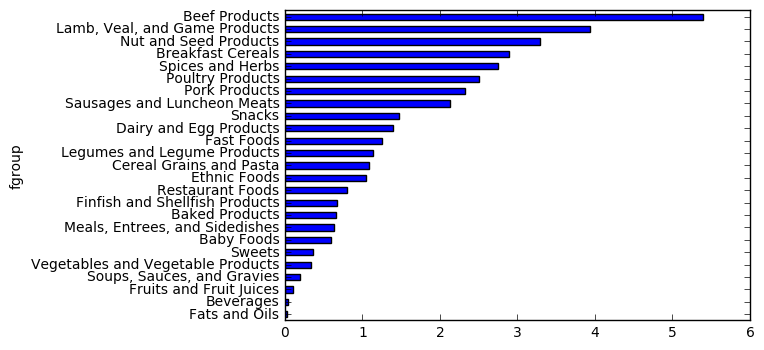

In [27]:
result['Zinc, Zn'].order().plot(kind='barh')

C:\tools\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


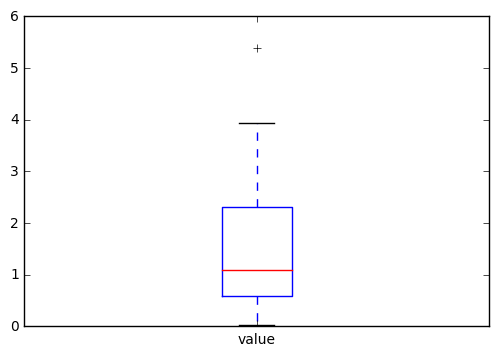

In [30]:
result['Zinc, Zn'].order().plot(kind='box')

In [31]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [32]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 